In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


train_df_raw = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv", encoding='latin-1')
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv", encoding='latin-1')

train_df_target = train_df_raw['SalePrice']
train_df = train_df_raw.drop(['SalePrice'],axis=1,inplace=False)


house_df_org = pd.concat([train_df, test_df])
house_df = house_df_org.copy()
#train_df_raw.shape
house_df.reset_index(drop = True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [2]:
# counting null in each column of df

house_df.isnull().sum()[house_df.isnull().sum()>0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [3]:
house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis =1,inplace=True)

In [4]:
#Filling null values with mean values to complete data

for col in house_df:
    col_dt = house_df[col].dtype
    
    if col_dt != "object":
        house_df[col].fillna(house_df[col].mean(),inplace = True)

In [5]:
house_df.isnull().sum()[house_df.isnull().sum()>0].sort_values(ascending=False)

GarageCond      159
GarageQual      159
GarageFinish    159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MSZoning          4
Functional        2
Utilities         2
KitchenQual       1
Electrical        1
Exterior2nd       1
Exterior1st       1
SaleType          1
dtype: int64

In [6]:
# Changing all objects into categories by using OHE
print('before get_dummies() shape:', house_df.shape)

house_df_ohe = pd.get_dummies(house_df)
print('after get_dummies() shape:', house_df_ohe.shape)

pd.set_option("display.max_columns",300)

house_df_ohe.reset_index(drop = True)


before get_dummies() shape: (2919, 73)
after get_dummies() shape: (2919, 266)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_Co

<Axes: xlabel='SalePrice', ylabel='Count'>

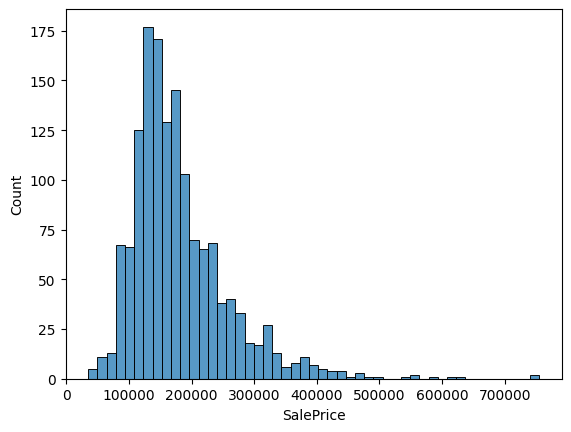

In [7]:
# to find skewness in taget column

sns.histplot(train_df_target)

<Axes: xlabel='SalePrice', ylabel='Count'>

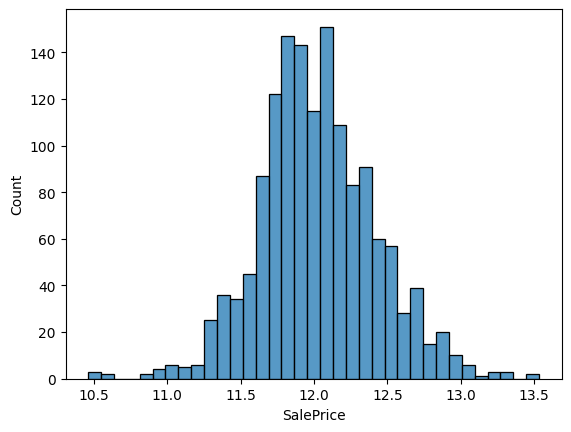

In [8]:
#changing target column by log transformation
train_df_target_org = train_df_target.copy()
train_df_target = np.log1p(train_df_target)
sns.histplot(train_df_target)

In [9]:
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

y_target = train_df_target
X_features = house_df_ohe.iloc[:1460,:]

X_train, X_test, y_train , y_test = train_test_split(X_features, y_target , test_size =0.25, random_state = 156)

rmse = []

lr_reg = LinearRegression()
lr_reg.fit(X_train , y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test , pred)

rmse.append(np.sqrt(mse))


ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test , pred)
rmse.append(np.sqrt(mse))


lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
pred = lasso_reg.predict(X_test)
mse = mean_squared_error(y_test , pred)
rmse.append(np.sqrt(mse))

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test , pred)
rmse.append(np.sqrt(mse))

svm_reg = SVR()
svm_reg.fit(X_train, y_train)
pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test , pred)
rmse.append(np.sqrt(mse))

CBR = CatBoostRegressor()
CBR.fit(X_train, y_train)
pred = CBR.predict(X_test)
mse = mean_squared_error(y_test , pred)
rmse.append(np.sqrt(mse))




print(rmse)

Learning rate set to 0.041534
0:	learn: 0.3913900	total: 62.4ms	remaining: 1m 2s
1:	learn: 0.3819682	total: 68.5ms	remaining: 34.2s
2:	learn: 0.3716502	total: 72.9ms	remaining: 24.2s
3:	learn: 0.3628654	total: 77.1ms	remaining: 19.2s
4:	learn: 0.3545775	total: 81.1ms	remaining: 16.1s
5:	learn: 0.3454076	total: 85.1ms	remaining: 14.1s
6:	learn: 0.3370384	total: 89.2ms	remaining: 12.7s
7:	learn: 0.3304941	total: 93.8ms	remaining: 11.6s
8:	learn: 0.3226055	total: 98ms	remaining: 10.8s
9:	learn: 0.3150105	total: 102ms	remaining: 10.1s
10:	learn: 0.3078292	total: 108ms	remaining: 9.7s
11:	learn: 0.3017695	total: 112ms	remaining: 9.23s
12:	learn: 0.2951012	total: 116ms	remaining: 8.8s
13:	learn: 0.2886011	total: 120ms	remaining: 8.45s
14:	learn: 0.2824142	total: 124ms	remaining: 8.13s
15:	learn: 0.2762349	total: 128ms	remaining: 7.86s
16:	learn: 0.2706816	total: 132ms	remaining: 7.62s
17:	learn: 0.2649235	total: 136ms	remaining: 7.42s
18:	learn: 0.2600867	total: 140ms	remaining: 7.22s
19:	le

In [10]:
estimators = [('lr_reg',lr_reg),('ridge_reg',ridge_reg),('lasso_reg',lasso_reg),('tree_reg',tree_reg),('svm_reg',svm_reg),('CBR',CBR)]

from sklearn.model_selection import cross_val_score

for estimator in estimators:
    scores = cross_val_score(estimator[1],X_train,y_train , scoring='neg_mean_squared_error',cv=10)
    print(estimator[0],np.round(np.mean(scores),2))
    
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X_train,y_train, scoring='neg_mean_squared_error',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

lr_reg -0.03
ridge_reg -0.02
lasso_reg -0.05
tree_reg -0.05
svm_reg -0.04
Learning rate set to 0.040845
0:	learn: 0.3898295	total: 7.3ms	remaining: 7.29s
1:	learn: 0.3799609	total: 11.7ms	remaining: 5.82s
2:	learn: 0.3707876	total: 15.6ms	remaining: 5.18s
3:	learn: 0.3612538	total: 19.6ms	remaining: 4.88s
4:	learn: 0.3516849	total: 23.7ms	remaining: 4.71s
5:	learn: 0.3439892	total: 27.7ms	remaining: 4.59s
6:	learn: 0.3358953	total: 31.7ms	remaining: 4.49s
7:	learn: 0.3279391	total: 35.6ms	remaining: 4.41s
8:	learn: 0.3213354	total: 39.6ms	remaining: 4.36s
9:	learn: 0.3141859	total: 43.4ms	remaining: 4.29s
10:	learn: 0.3076450	total: 47.3ms	remaining: 4.25s
11:	learn: 0.3011444	total: 51.4ms	remaining: 4.23s
12:	learn: 0.2948063	total: 55.5ms	remaining: 4.22s
13:	learn: 0.2886731	total: 59.5ms	remaining: 4.19s
14:	learn: 0.2826854	total: 63.5ms	remaining: 4.17s
15:	learn: 0.2768182	total: 67.5ms	remaining: 4.15s
16:	learn: 0.2713593	total: 71.2ms	remaining: 4.12s
17:	learn: 0.2658801	to

In [11]:
# tuning hyperparameters for the ridge regression

from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(ridge_reg, param_grid={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(X_features, y_target)

best_ridge = grid_model.best_estimator_
print(best_ridge)

Ridge(alpha=10)


In [12]:
ridge_reg = Ridge(alpha =10)
ridge_reg.fit(X_train,y_train)
pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test , pred)
print(np.sqrt(mse))

0.1224984949092664


In [13]:
#changing feature columns by log transformation

from scipy.stats import skew

skew_features = house_df[house_df.dtypes[house_df.dtypes != "object"].index].apply(lambda x: skew(x))

skew_features_index = skew_features[skew_features >1]
print(skew_features_index.sort_values(ascending = False))

house_df[skew_features_index.index] = np.log1p(house_df[skew_features_index.index])

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146034
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931343
MasVnrArea        2.611549
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.645574
1stFlrSF          1.469604
BsmtFinSF1        1.425233
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162484
dtype: float64


In [14]:
#tuning hyper parameter (alpha value) for ridge regression again after feature engineering

house_df_ohe = pd.get_dummies(house_df)
y_target = train_df_target
X_features = house_df_ohe.iloc[:1460,:]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

grid_model = GridSearchCV(ridge_reg, param_grid={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(X_features, y_target)

best_ridge = grid_model.best_estimator_
print(best_ridge)


ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test , pred)
print(np.sqrt(mse))

Ridge(alpha=10)
0.12248539274034051


In [15]:
house_df_ohe.reset_index(drop = True)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_Co

523
1298
523
1298


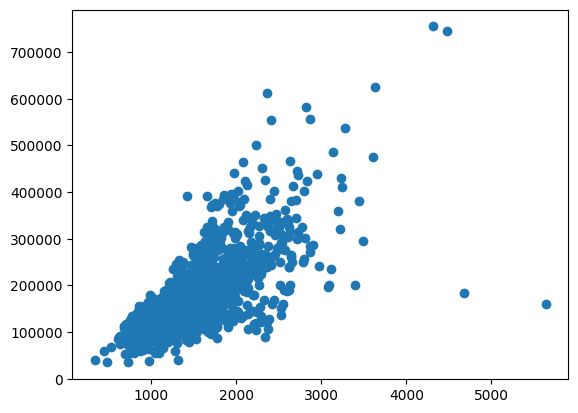

In [16]:


#deleting outliers in [GrLivArea]
plt.scatter(x = house_df_org.iloc[:1460,:]['GrLivArea'], y = train_df_target_org)

cond1 = house_df_ohe[house_df_ohe.iloc[:1460,:]['GrLivArea'] > np.log1p(4000)].index
cond2 = train_df_target[train_df_target < np.log1p(300000)].index


for i in cond1:
    for j in cond2:
        if i == j:
            print (i)



In [17]:


X_features = house_df_ohe.iloc[:1460,:]
y_target = train_df_target
X_features.drop([523, 1298], axis=0, inplace=True)
y_target.drop([523, 1298], axis=0, inplace=True)



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

grid_model = GridSearchCV(ridge_reg, param_grid={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(X_features, y_target)

best_ridge = grid_model.best_estimator_
print(best_ridge)


ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test , pred)
print(np.sqrt(mse))

estimators = [('lr_reg',lr_reg),('ridge_reg',ridge_reg),('lasso_reg',lasso_reg),('tree_reg',tree_reg),('svm_reg',svm_reg),('CBR',CBR)]

from sklearn.model_selection import cross_val_score

for estimator in estimators:
    scores = cross_val_score(estimator[1],X_train,y_train , scoring='neg_mean_squared_error',cv=10)
    print(estimator[0],np.round(np.mean(scores),2))
    
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X_train,y_train, scoring='neg_mean_squared_error',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Ridge(alpha=8)
0.10333920850218296
lr_reg -0.02
ridge_reg -0.01
lasso_reg -0.06
tree_reg -0.05
svm_reg -0.07
Learning rate set to 0.041254
0:	learn: 0.3785659	total: 4.42ms	remaining: 4.42s
1:	learn: 0.3687533	total: 8.54ms	remaining: 4.26s
2:	learn: 0.3599986	total: 12.7ms	remaining: 4.21s
3:	learn: 0.3508626	total: 16.7ms	remaining: 4.16s
4:	learn: 0.3417611	total: 21ms	remaining: 4.17s
5:	learn: 0.3333635	total: 25.2ms	remaining: 4.17s
6:	learn: 0.3264021	total: 29.3ms	remaining: 4.16s
7:	learn: 0.3184052	total: 33.4ms	remaining: 4.14s
8:	learn: 0.3117815	total: 37.4ms	remaining: 4.12s
9:	learn: 0.3047712	total: 41.4ms	remaining: 4.1s
10:	learn: 0.2980318	total: 45.3ms	remaining: 4.07s
11:	learn: 0.2912709	total: 49.3ms	remaining: 4.06s
12:	learn: 0.2846905	total: 53.4ms	remaining: 4.06s
13:	learn: 0.2783992	total: 57.4ms	remaining: 4.04s
14:	learn: 0.2725513	total: 61.3ms	remaining: 4.02s
15:	learn: 0.2668273	total: 65.3ms	remaining: 4.01s
16:	learn: 0.2607559	total: 69.5ms	remaini

In [19]:


#final prediction

X_train = house_df_ohe.iloc[:1460,:]
X_test = house_df_ohe.iloc[1460:,:]
y_train = train_df_target

X_train.drop([523, 1298], axis=0, inplace=True)

ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)
pred_exp = np.expm1(pred)

X_test['Id'] = [i for i in range (1461,2920)]

dict = {'Id':X_test.iloc[:, -1], 'SalePrice': pred_exp}
df = pd.DataFrame(dict)
print(df)  
df.to_csv("/kaggle/working/submission.csv", index = False)



        Id      SalePrice
0     1461  121806.386243
1     1462  151774.938324
2     1463  181289.520069
3     1464  195386.574705
4     1465  199492.024031
...    ...            ...
1454  2915   84592.883733
1455  2916   77858.713069
1456  2917  165000.252115
1457  2918  118350.816597
1458  2919  222082.917176

[1459 rows x 2 columns]
